# Indexing Overview in LlamaIndex
* Notebook by Adam Lang
* Date: 3/12/2024

## What is a Node in LlamaIndex?
* A node is the `atomic unit` of data in LlamaIndex.
* A node represents a chunk of a source document.
* Nodes contain metadata for their linked source document.
* Nodes also contain the embedding chunks.

## What is an Index?
* The index is the organization of the nodes within LlamaIndex.
* This allows for easy search and retrieval of information in a `data structure`.
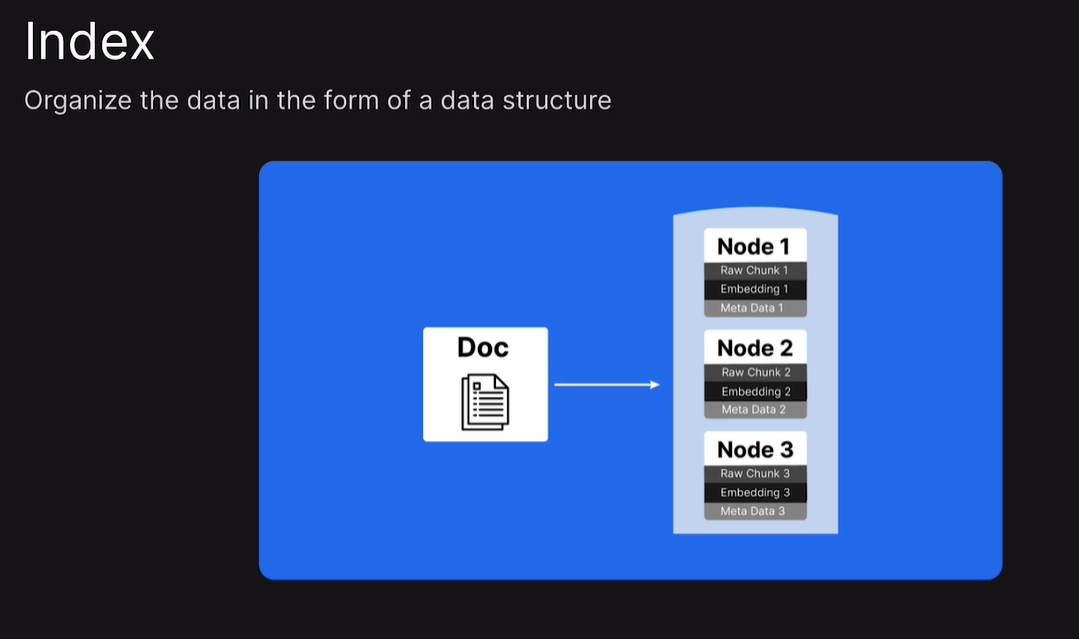



## Indexing within LlamaIndex does the following:
1. chunking
2. embeddings
3. storage

## Different types of Indexing
1. Vector Store Index
    * Most frequent type of index encountered.
    * Document => chunking => node => vector embeddings => nodes stored as vector index with metadata

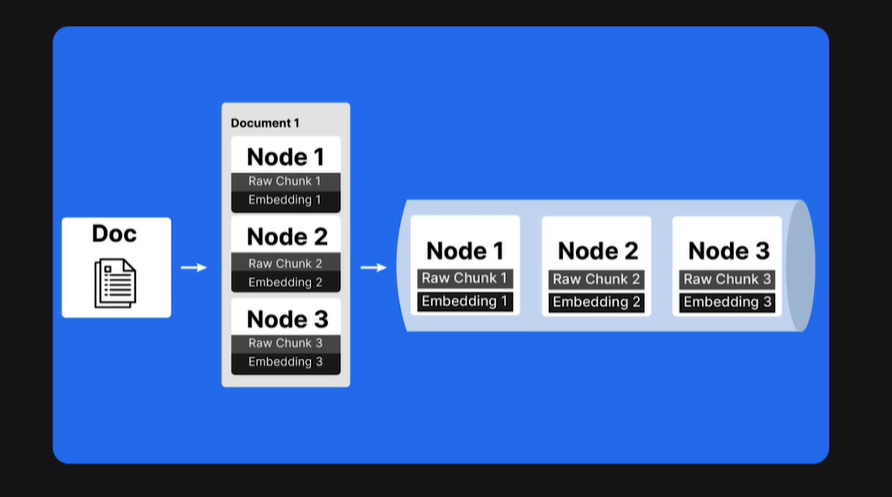

2. Summary Index
    * Document => chunking => node => vector embeddings => stores as sequence or list of node storage
    * Similar diagram to above.

3. Keyword Table Index
    * Extract keywords of document that best describe documents.
    * Use keywords to retrieve documents from each node.

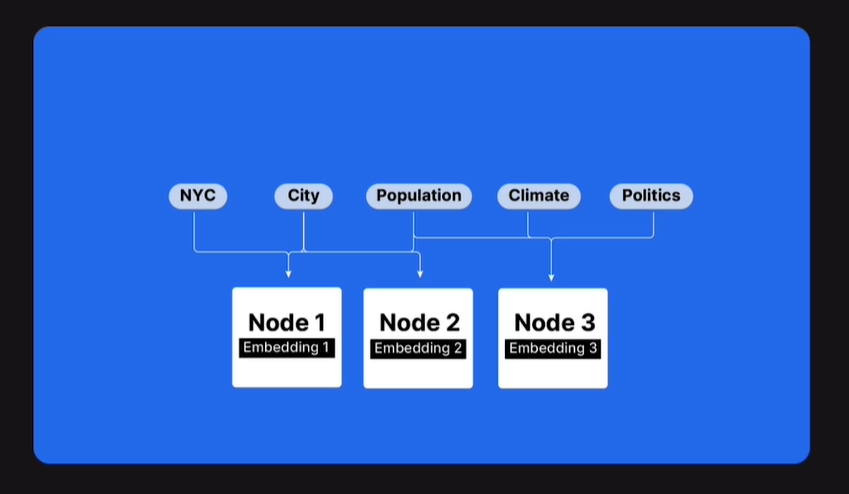



* Diagram below shows each keyword linked to each node from each document.

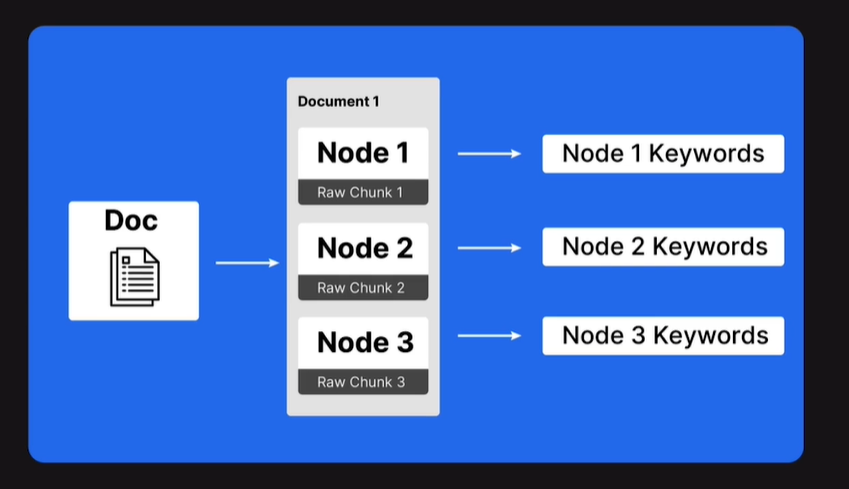

4. Document Summary Index
  * Most effective when working with multiple documents.
  * Enhances retrieval performance while working with multiple documents.
  * Carries more semantic meaning that keyword text method above.
  * Process is similar to above:
      * Each document => chunks => stored as node => document summary and embedding stored
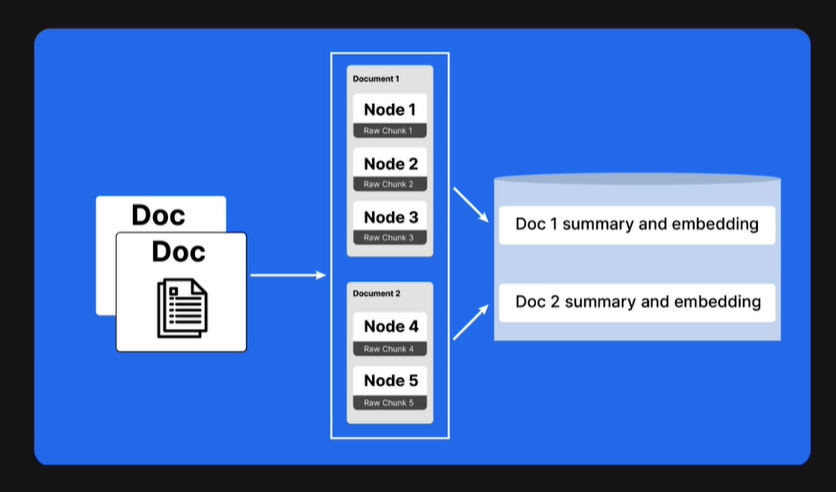

# Indexing in LlamaIndex - Implementation


In [1]:
!pip install llama-index

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 48.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 60.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.4/227.4 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 61.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.1/286.1 kB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 525.5/525.5 kB 44.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.6/30.6 MB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━

## Setup

In [2]:
import os
os.environ["OPENAI_API_KEY"] = '<your_key>'

### Download Data

In [3]:
!mkdir data
!wget 'https://raw.githubusercontent.com/aravindpai/Speech-Recognition/1882379d3152c8cd830d74e677be4dd161d024ea/transformers.pdf' -O 'data/transformers.pdf'

--2024-03-12 18:58:44--  https://raw.githubusercontent.com/aravindpai/Speech-Recognition/1882379d3152c8cd830d74e677be4dd161d024ea/transformers.pdf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2215244 (2.1M) [application/octet-stream]
Saving to: ‘data/transformers.pdf’

data/transformers.p 100%[===================>]   2.11M  --.-KB/s    in 0.01s   

2024-03-12 18:58:44 (149 MB/s) - ‘data/transformers.pdf’ saved [2215244/2215244]



### Load Data

In [5]:
from pathlib import Path
from llama_index.core import download_loader
PDFReader = download_loader("PDFReader")

<ipython-input-5-6d5e5715eb2a>:3: DeprecationWarning: Call to deprecated function (or staticmethod) download_loader. (`download_loader()` is deprecated. Please install tool using pip install directly instead.)
  PDFReader = download_loader("PDFReader")


In [6]:
# instatiate loader
loader = PDFReader()

In [7]:
# documents load
documents = loader.load_data(file=Path('./data/transformers.pdf'))

In [8]:
# check len of docs
len(documents)

15

In [9]:
# inspect 1st page
documents[0]

Document(id_='2aa10d0d-5474-4b80-a676-c084e7d9d5b1', embedding=None, metadata={'page_label': '1', 'file_name': '/content/data/transformers.pdf'}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={}, text='Provided proper attribution is provided, Google hereby grants permission to\nreproduce the tables and figures in this paper solely for use in journalistic or\nscholarly works.\nAttention Is All You Need\nAshish Vaswani∗\nGoogle Brain\navaswani@google.comNoam Shazeer∗\nGoogle Brain\nnoam@google.comNiki Parmar∗\nGoogle Research\nnikip@google.comJakob Uszkoreit∗\nGoogle Research\nusz@google.com\nLlion Jones∗\nGoogle Research\nllion@google.comAidan N. Gomez∗ †\nUniversity of Toronto\naidan@cs.toronto.eduŁukasz Kaiser∗\nGoogle Brain\nlukaszkaiser@google.com\nIllia Polosukhin∗ ‡\nillia.polosukhin@gmail.com\nAbstract\nThe dominant sequence transduction models are based on complex recurrent or\nconvolutional neural networks that include an encoder and a decoder. T

## 1. VectorStoreIndex

In [11]:
from llama_index.core import VectorStoreIndex

In [12]:
# construct an index by loading docs into the VectorStoreIndex
index = VectorStoreIndex.from_documents(documents)

## 2. Summary Index

In [13]:
from llama_index.core import SummaryIndex

In [14]:
# create index
index = SummaryIndex.from_documents(documents)

## 3. Keyword Table Index

In [17]:
from llama_index.core import KeywordTableIndex

In [18]:
keyword_table_index = KeywordTableIndex.from_documents(
    documents,
    show_progress=True
)

Parsing nodes:   0%|          | 0/15 [00:00<?, ?it/s]

Extracting keywords from nodes:   0%|          | 0/15 [00:00<?, ?it/s]

## 4. Document Summary Index

In [19]:
from llama_index.core import DocumentSummaryIndex
from llama_index.core import get_response_synthesizer

In [20]:
# instantiate response_synthesizer
response_synthesizer = get_response_synthesizer(
    response_mode="tree_summarize"
)

In [21]:
# now create document summary index
doc_summary_index = DocumentSummaryIndex.from_documents(
    documents,
    response_synthesizer=response_synthesizer,
    show_progress=True
)

Parsing nodes:   0%|          | 0/15 [00:00<?, ?it/s]

Summarizing documents:   0%|          | 0/15 [00:00<?, ?it/s]

current doc id: 2aa10d0d-5474-4b80-a676-c084e7d9d5b1
current doc id: 62f39675-f570-42ad-97c6-097b28c2ac40
current doc id: b8867053-577c-4d00-a230-df21235b1b0e
current doc id: b0356ac7-5ec8-4b07-8a0b-6e7412cae768
current doc id: 8177be83-5bf4-4b77-9ed0-7d8bbfc50181
current doc id: 9b6d63b3-70af-436e-8ef2-6f20e157a3e3
current doc id: a7528d66-6be4-4bd7-afe4-c1f0c843da33
current doc id: e632f6f1-e24a-4e6c-a337-ca9d98ee4366
current doc id: 57d6a50d-7458-4994-96ad-c4c59e450892
current doc id: 866b8d21-3b10-471b-8f1f-ff0a3b77c8a5
current doc id: eb0695ae-41f7-4049-b39f-5ce79dfbbd9a
current doc id: be88ebbe-fbde-4c3a-8cd1-a5b84369fc69
current doc id: 164580f2-cabc-4838-b92f-e0399f4eca11
current doc id: 016fc76b-0b00-45a7-bd9d-58d3790765c7
current doc id: 554aacec-9563-45d8-b4f7-7ca20f091a28


Generating embeddings:   0%|          | 0/15 [00:00<?, ?it/s]

Summary:
* Indexes and embeddings are created at backend that can be used for querying.